# The Sparks Foundation,GRIP-May 2021


# Task 3:Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’


# Author: Vivin George

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inlin

Importing the dataset using pandas

In [5]:
file= pd.read_csv("C:/Users/Vivin/Downloads/SampleSuperstore.csv")
file.set_index(["Postal Code"], inplace=True)
file.head(5)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Postal Code,,,,,,,,,,,,
42420,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
42420,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
90036,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
33311,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
33311,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Checking for null values, and information regarding the number of entries and the names of columns.using describe to understand the range as well as the maximum and minimum of the entries in the various columns

In [6]:
file.isna().count()
file.info()
file.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 42420 to 92683
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1015.0+ KB


,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Checking for number of values in all columns by looping through all the columns.

In [9]:
columns=["Ship Mode", "City", "Category", "Sub-Category"]
for x in columns:
    print(file[x].value_counts())

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Champaign          1
Yucaipa            1
Glenview           1
Romeoville         1
Rogers             1
Name: City, Length: 531, dtype: int64
Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


Using corr() is used to find the pairwise correlation of all columns in the dataframe.Here 1 means strong relation and zero means no  correlation

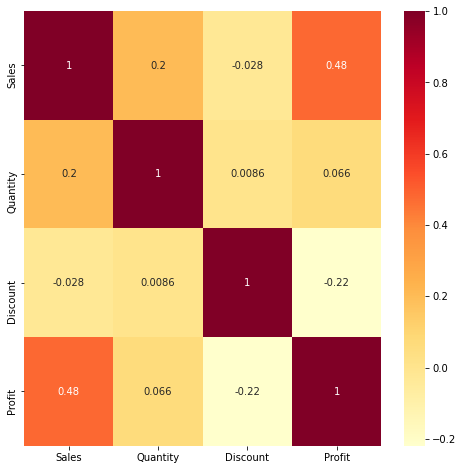

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(file.corr(),annot =True,cmap = 'YlOrRd')
plt.show()

In [ ]:
Suggestions:
Strong relation between sales and profit

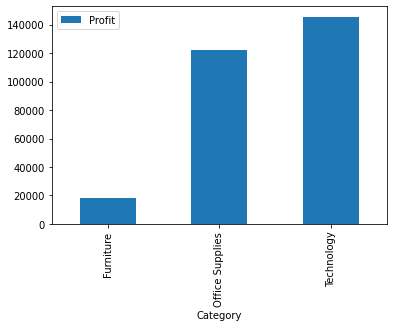

In [21]:
profit_sum=file.groupby(by="Category")[['Profit']].sum()
b=profit_sum.sort_values(by=['Profit'],ascending=True)
b.plot(kind='bar')
plt.show()

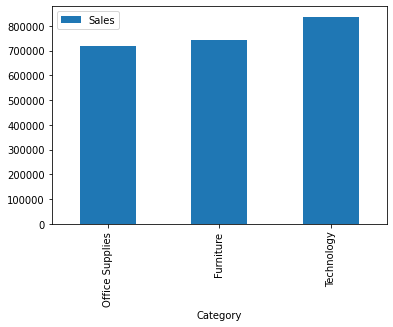

In [26]:
sales_sum=file.groupby(by="Category")[["Sales"]].sum()
c=sales_sum.sort_values(by='Sales',ascending=True)
c.plot(kind='bar')
plt.show()

Suggestion(Insight):
Our furniture industry is not making as much profit as the other two categories.We should try and explore if this is due to the type of market or due to some other reason.uunderstadning the cause behind this will help us arrive at a more useful suggestion.

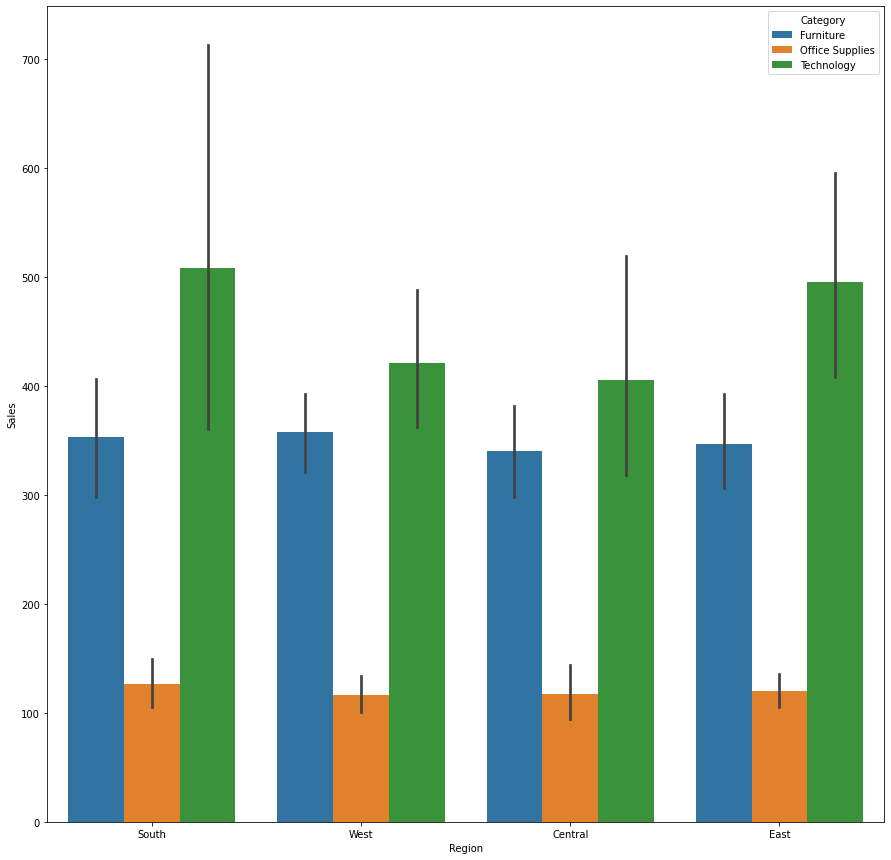

In [13]:
plt.figure(figsize=(15,15))
sns.barplot(x='Region',y='Sales', hue='Category',data=file)
plt.show()

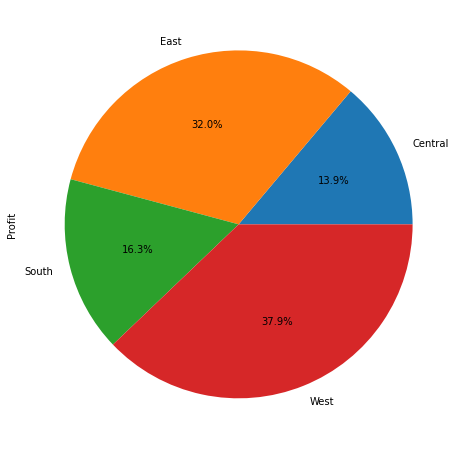

In [14]:
plt.figure(figsize=(8,8))
file.groupby('Region')['Profit'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Insight: Central region is the lowest in terms of its contribution to the profit percentage. So the region needs to be analysed ot understand whether it's because of competiton from rivals or due to lack of brand exposure or due to some other reason.

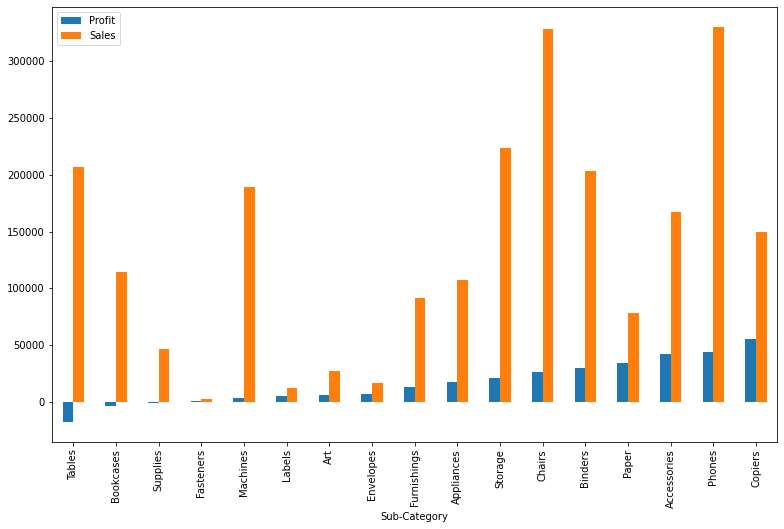

In [15]:
subcategory_grpby=file.groupby(by="Sub-Category")[['Profit','Sales']].sum()
subprofit=subcategory_grpby.sort_values(by=['Profit'],ascending=True).plot(kind='bar',figsize=(13,8))

Tables, Bookcases and Supplies are actually resuting in losses and these sub-categories need to be analysed to understand or the production need to restructured to gives us suitable porift in the future.They're pricing as well as the production facilities need to be optimised to convert these 